In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd

# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
# 각 column별 합계 정보는 필요하지 않으므로 제거해줍니다.
data = pd.read_excel(base_path + "/#16_부서별 매출  광고비 데이터.xlsx",
                     header=2,
                     skiprows=[3])

# 잘못되어 있는 column 이름들을 고쳐줍니다.
columns = [col.strip() for col in data.columns.to_list()]
columns[0] = "날짜"
columns[1] = "회사명"
columns[2] = "합계"
data.columns = columns
data.drop(columns=["합계"], inplace=True)
data

,날짜,회사명,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,광고비
0,2020-10-01,A사,9103.8468,28231.9884,1468.9428,1649.7684,19886.2056,2594.4924,3612.8604,2215.9092,10225.9896,7755.8556,7367.4192,25379.5584,6746.7288,20097.3252,2832.3564,7343.2044,1908.0732,6778.5528,1026.4668,7757.814,30703.1424,2757.672,6250.8864,309.604000
1,2020-10-01,B사,4551.9234,14115.9942,734.4714,824.8842,9943.1028,1297.2462,1806.4302,1107.9546,5112.9948,3877.9278,3683.7096,12689.7792,3373.3644,10048.6626,1416.1782,3671.6022,954.0366,3389.2764,513.2334,3878.907,15351.5712,1378.836,3125.4432,224.400000
2,2020-10-01,C사,9103.8468,28231.9884,1468.9428,1649.7684,19886.2056,2594.4924,3612.8604,2215.9092,10225.9896,7755.8556,7367.4192,25379.5584,6746.7288,20097.3252,2832.3564,7343.2044,1908.0732,6778.5528,1026.4668,7757.814,30703.1424,2757.672,6250.8864,309.604000
3,2020-10-02,A사,9282.3536,28785.5568,1497.7456,1682.1168,20276.1312,2645.3648,3683.7008,2259.3584,10426.4992,7907.9312,7511.8784,25877.1968,6879.0176,20491.3904,2887.8928,7487.1888,1945.4864,6911.4656,1046.5936,7909.928,31305.1648,2811.744,6373.4528,315.674667
4,2020-10-02,B사,4641.1768,14392.7784,748.8728,841.0584,10138.0656,1322.6824,1841.8504,1129.6792,5213.2496,3953.9656,3755.9392,12938.5984,3439.5088,10245.6952,1443.9464,3743.5944,972.7432,3455.7328,523.2968,3954.964,15652.5824,1405.872,3186.7264,228.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-10-30,B사,3570.1360,11071.3680,576.0560,646.9680,7798.5120,1017.4480,1416.8080,868.9840,4010.1920,3041.5120,2889.1840,9952.7680,2645.7760,7881.3040,1110.7280,2879.6880,748.2640,2658.2560,402.5360,3042.280,12040.4480,1081.440,2451.3280,176.000000
92,2020-10-30,C사,7140.2720,22142.7360,1152.1120,1293.9360,15597.0240,2034.8960,2833.6160,1737.9680,8020.3840,6083.0240,5778.3680,19905.5360,5291.5520,15762.6080,2221.4560,5759.3760,1496.5280,5316.5120,805.0720,6084.560,24080.8960,2162.880,4902.6560,242.826667
93,2020-10-31,A사,8925.3400,27678.4200,1440.1400,1617.4200,19496.2800,2543.6200,3542.0200,2172.4600,10025.4800,7603.7800,7222.9600,24881.9200,6614.4400,19703.2600,2776.8200,7199.2200,1870.6600,6645.6400,1006.3400,7605.700,30101.1200,2703.600,6128.3200,303.533333
94,2020-10-31,B사,4462.6700,13839.2100,720.0700,808.7100,9748.1400,1271.8100,1771.0100,1086.2300,5012.7400,3801.8900,3611.4800,12440.9600,3307.2200,9851.6300,1388.4100,3599.6100,935.3300,3322.8200,503.1700,3802.850,15050.5600,1351.800,3064.1600,220.000000


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   날짜           96 non-null     datetime64[ns]
 1   회사명          96 non-null     object        
 2   컴퓨터 및 주변기기   96 non-null     float64       
 3   가전·전자·통신기기   96 non-null     float64       
 4   서적           96 non-null     float64       
 5   사무·문구        96 non-null     float64       
 6   의복           96 non-null     float64       
 7   신발           96 non-null     float64       
 8   가방           96 non-null     float64       
 9   패션용품 및 액세서리  96 non-null     float64       
 10  스포츠·레저용품     96 non-null     float64       
 11  화장품          96 non-null     float64       
 12  아동·유아용품      96 non-null     float64       
 13  음·식료품        96 non-null     float64       
 14  농축수산물        96 non-null     float64       
 15  생활용품         96 non-null     float64       
 16  자동차 및 자동차용

In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,광고비
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,4648.614583,14415.843750,750.072917,842.406250,10154.312500,1324.802083,1844.802083,1131.489583,5221.604167,3960.302083,3761.958333,12959.333333,3445.020833,10262.114583,1446.260417,3749.593750,974.302083,3461.270833,524.135417,3961.302083,15677.666667,1408.125000,3191.833333,172.305556
std,2438.454563,7561.904593,393.454586,441.888508,5326.496573,694.931711,967.700371,593.528650,2739.019180,2077.396719,1973.354491,6797.884602,1807.103303,5383.044707,758.643301,1966.868585,511.075143,1815.627324,274.937914,2077.921274,8223.800260,738.639173,1674.292505,77.864095
min,1338.801000,4151.763000,216.021000,242.613000,2924.442000,381.543000,531.303000,325.869000,1503.822000,1140.567000,1083.444000,3732.288000,992.166000,2955.489000,416.523000,1079.883000,280.599000,996.846000,150.951000,1140.855000,4515.168000,405.540000,919.248000,66.000000
25%,2677.602000,8303.526000,432.042000,485.226000,5848.884000,763.086000,1062.606000,651.738000,3007.644000,2281.134000,2166.888000,7464.576000,1984.332000,5910.978000,833.046000,2159.766000,561.198000,1993.692000,301.902000,2281.710000,9030.336000,811.080000,1838.496000,112.200000
50%,4105.656400,12732.073200,662.464400,744.013200,8968.288800,1170.065200,1629.329200,999.331600,4611.720800,3497.738800,3322.561600,11445.683200,3042.642400,9063.499600,1277.337200,3311.641200,860.503600,3056.994400,462.916400,3498.622000,13846.515200,1243.656000,2819.027200,145.696000
75%,5399.830700,16745.444100,871.284700,978.539100,11795.249400,1538.890100,2142.922100,1314.338300,6065.415400,4600.286900,4369.890800,15053.561600,4001.736200,11920.472300,1679.976100,4355.528100,1131.749300,4020.612200,608.835700,4601.448500,18211.177600,1635.678000,3707.633600,238.906667
max,9639.367200,29892.693600,1555.351200,1746.813600,21055.982400,2747.109600,3825.381600,2346.256800,10827.518400,8212.082400,7800.796800,26872.473600,7143.595200,21279.520800,2998.965600,7775.157600,2020.312800,7177.291200,1086.847200,8214.156000,32509.209600,2919.888000,6618.585600,327.816000


In [6]:
# DataFrame 기준으로 correlation matrix를 만듭니다.
# pd.DataFrame.corr() 함수를 사용합니다.
corr = data.corr()
corr

,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,스포츠·레저용품,화장품,아동·유아용품,음·식료품,농축수산물,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타,광고비
컴퓨터 및 주변기기,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
가전·전자·통신기기,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
서적,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
사무·문구,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
의복,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
신발,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
가방,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
패션용품 및 액세서리,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
스포츠·레저용품,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914
화장품,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.961914


In [7]:
# 그래프를 이쁘게 그리기 위한 코드입니다. 한글 글꼴을 추가합니다.

%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져옵니다.
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/Lib

In [8]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [9]:
# 여전히 글꼴이 보이지 않는 분들은, 런타임 -> "다시 시작 및 모두 실행" 을 눌러주세요!
fm._rebuild()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

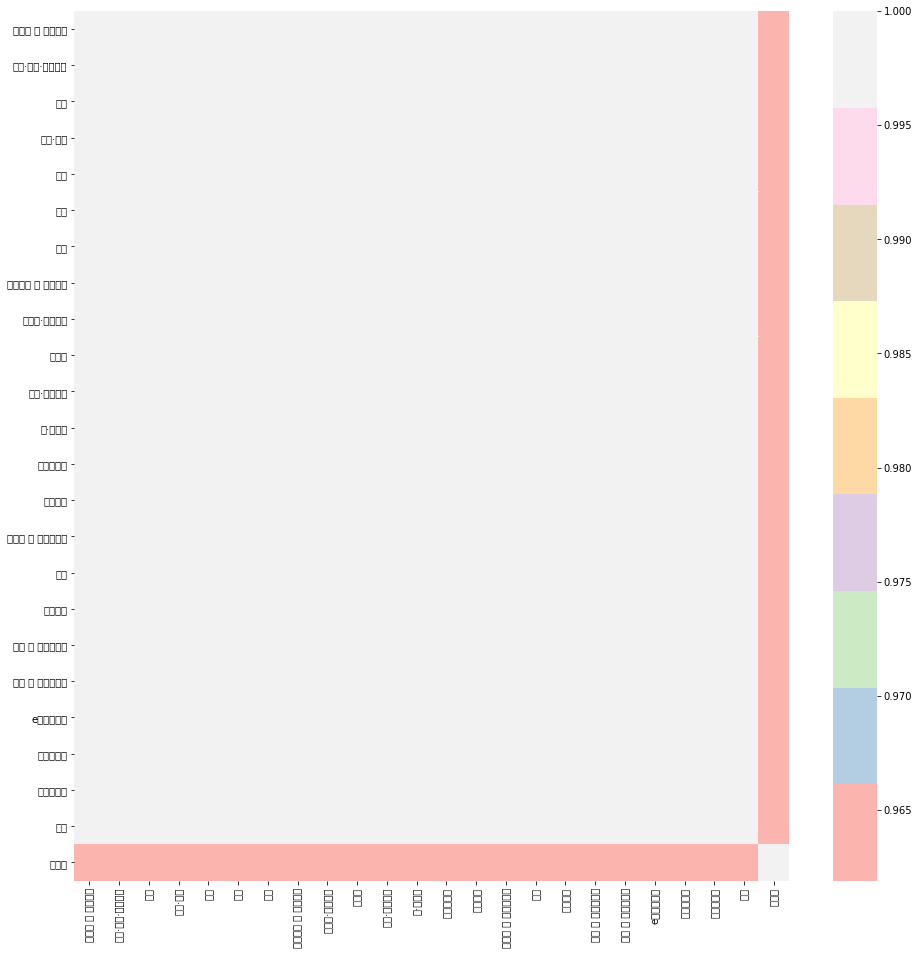

In [10]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# heatmap을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 만든 corr를 기준으로 heatmap을 그립니다.
sns.heatmap(corr, cmap=sns.color_palette("Pastel1"))
# plot을 출력합니다.
plt.show()